In [ ]:
import datacube
from datacube.storage import masking

dc = datacube.Datacube()

In [2]:
# Define some 'constants' for the program
p = 'LE07_scene'
start = '1999-1'
end = '2018-6'
res = (0.0025, -0.0025)
m = ['green', 'quality']

In [3]:
# Load data as an xarray.Dataset
data = dc.load(product = p
               , resolution = res
               , measurements = m
              )

In [4]:
# Isolate the band of interest as an xarray.DataArray
band = data.green.loc[ start : end ]

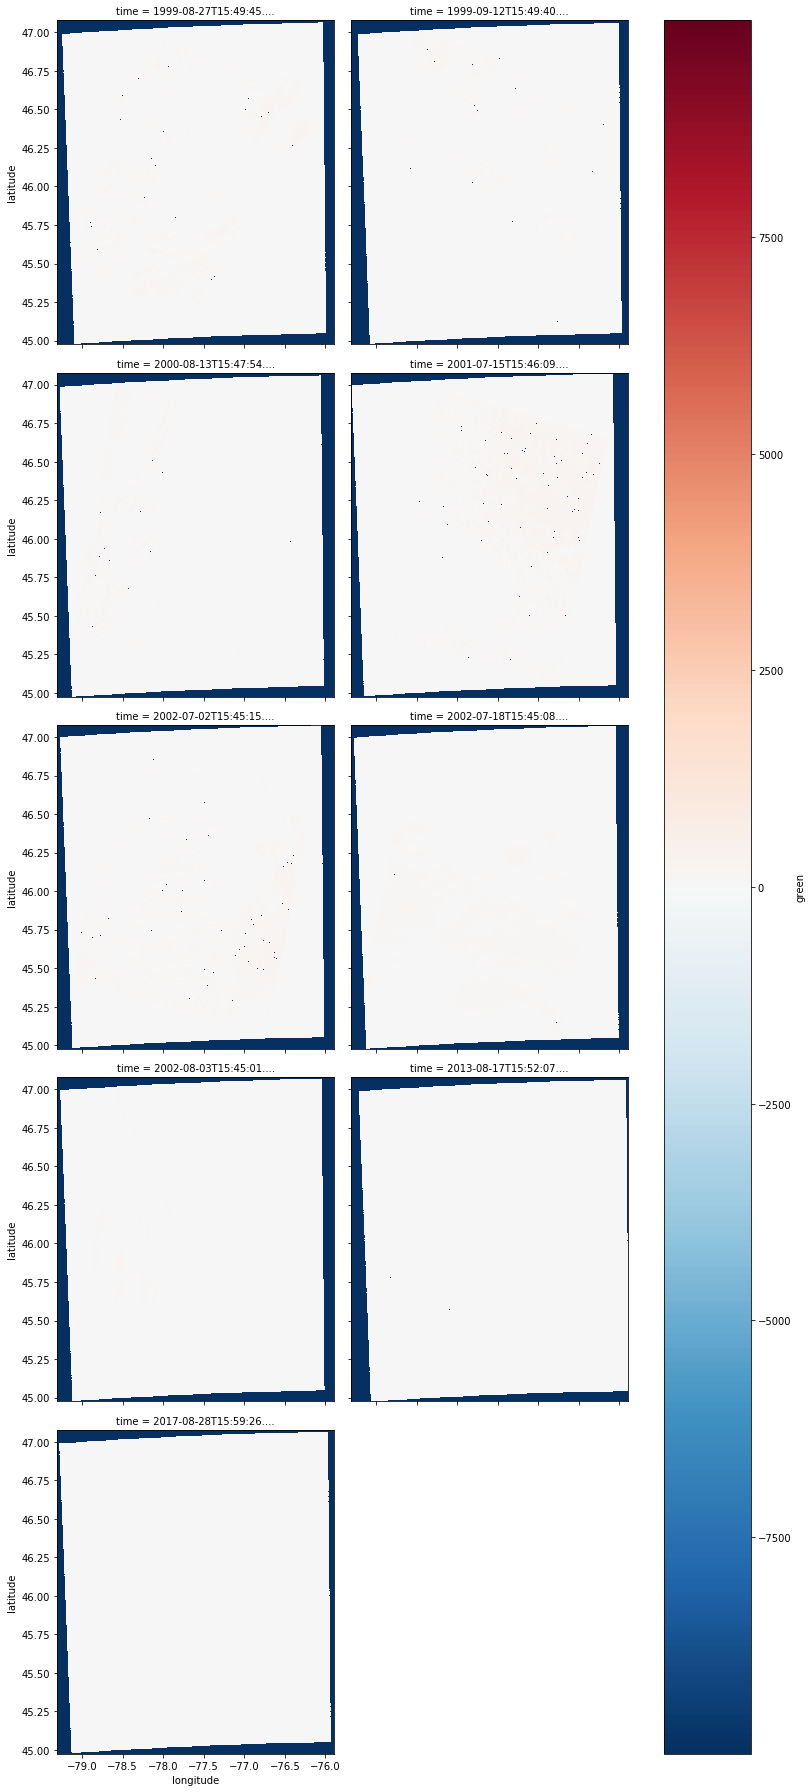

In [6]:
#Visualize the data using the plot function
band.plot(col='time'
        , col_wrap = 2
        , size = 5
         )

In [7]:
#Mask out all the invalid band data as a xarray.DataArray
validBandData = band.where(band != band.attrs['nodata'])

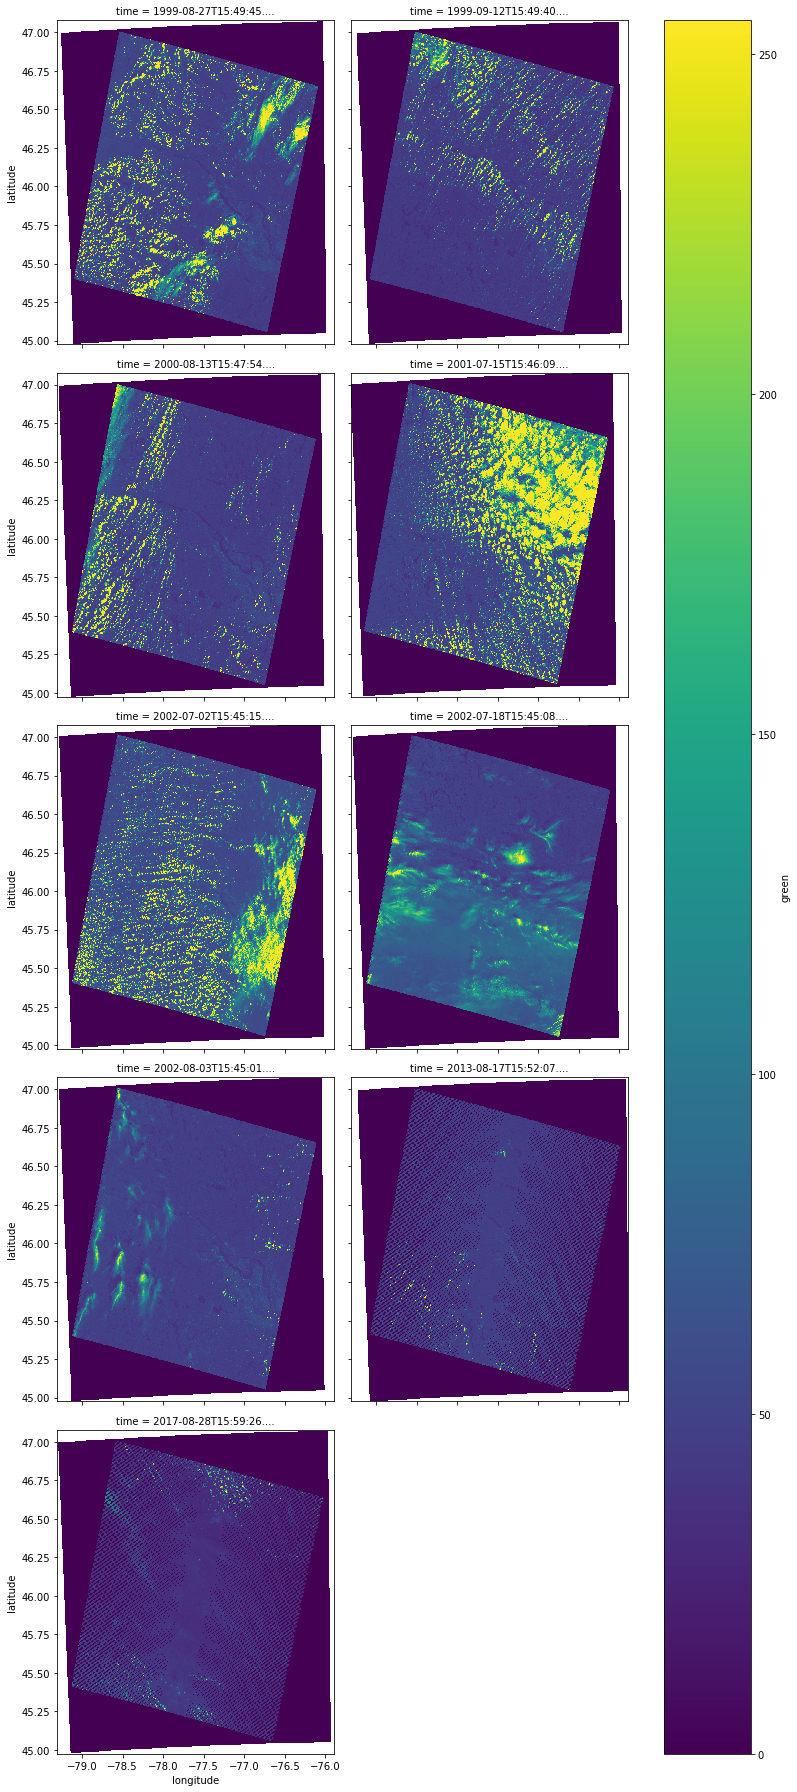

In [8]:
#Visualize the valid data using the plot function
validBandData.plot(col='time'
                   , col_wrap = 2
                   , size = 5
                  )

In [9]:
# Use the masking library to see how the bit flags are defined in the dataset
import pandas
pandas.DataFrame.from_dict(masking.get_flags_def(data.quality), orient='index')

,bits,values,description
cloud,[4],"{'0': False, '1': True}",Cloud
cloud_confidence,"[5, 6]","{'0': 'Not Determined', '1': 'Low', '2': 'Medi...","Cloud Confidence with low =(0-33)%, medium =(3..."
cloud_shadow_conf,"[7, 8]","{'0': 'Not Determined', '1': 'Low', '2': 'Medi...","Cloud Shadow Confidence with low =(0-33)%, med..."
designated_fill,[0],"{'0': False, '1': True}",Used to identify fill values
dropped_pixel,[1],"{'0': False, '1': True}",Dropped Pixel
radiometric_saturation,"[2, 3]","{'0': 'none', '1': '1-2', '2': '3-4', '3': '<=5'}","Radiometric saturation bits, represents how ma..."
snow_ice_conf,"[9, 10]","{'0': 'Not Determined', '1': 'Low', '2': 'Medi...","Snow/Ice Confidence with low =(0-33)%, medium ..."


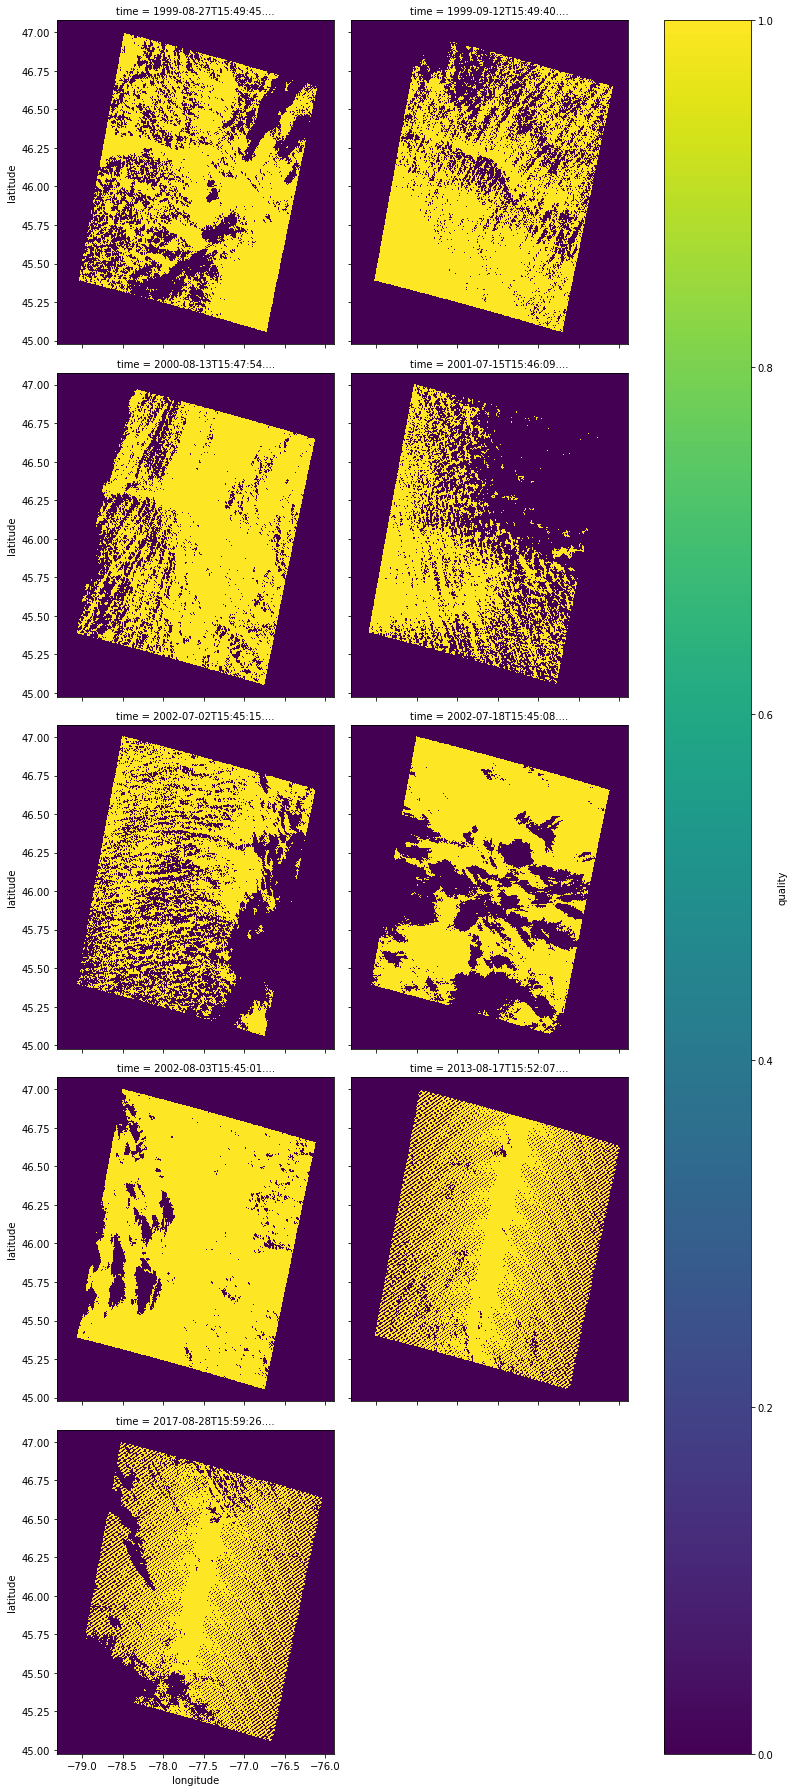

In [10]:
# Make a mask for the quality band
cloudFree = masking.make_mask(data, cloud = False, cloud_shadow_conf='Low', cloud_confidence='Low')
                              
#Visualize mask
cloudFree.quality.plot(col='time'
                      , col_wrap = 2
                      , size = 5
                     )

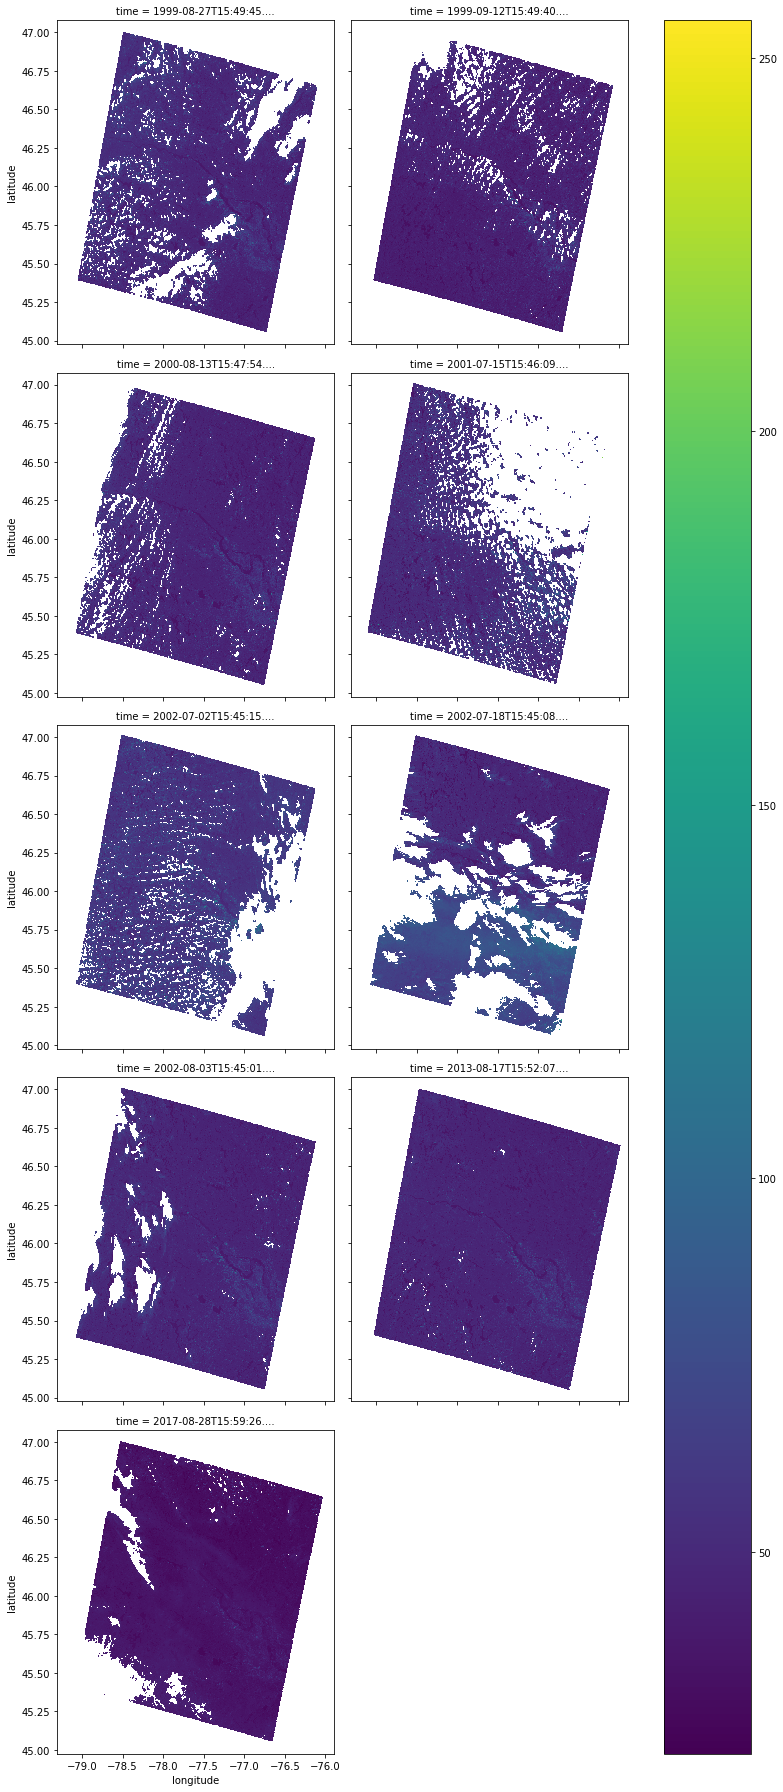

In [11]:
#  Combine the mask and the band info
cloudFreeData = validBandData.where(cloudFree.quality)
cloudFreeData.plot(col='time'
                       , col_wrap = 2
                       , size = 5
                      )

In [12]:
type(cloudFreeData)

xarray.core.dataarray.DataArray

In [18]:
cloudFreeData[1]

<xarray.DataArray (latitude: 841, longitude: 1368)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    time       datetime64[ns] 1999-09-12T15:49:40.708547
  * latitude   (latitude) float64 44.98 44.98 44.98 44.98 44.99 44.99 44.99 ...
  * longitude  (longitude) float64 -75.89 -75.89 -75.9 -75.9 -75.9 -75.9 ...
Attributes:
    nodata:   -9999
    units:    1
    crs:      EPSG:4326

In [58]:
type(cloudFree)

xarray.core.dataset.Dataset

In [56]:
merge =  cloudFreeData[7].where(cloudFreeData[8]) 

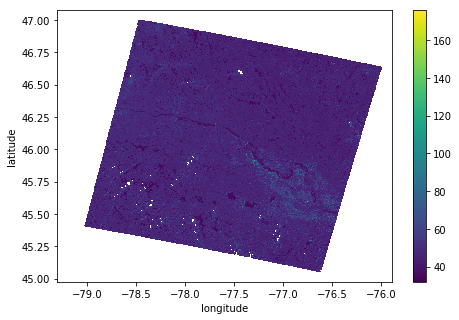

In [57]:
merge.plot(col_wrap = 2
           , size = 5
          )